## Lecture 4 Example. Regression diagnostics and transformations

---

In [1]:
# load custom function: regression_diagnostics(x, y, scale=1) 
source("https://raw.githubusercontent.com/uqglmn/sm/main/slr/diagnostics.R")

---

### Example 1

The following table gives the vapor pressure of water ($P$, mm Hg) for various
temperatures ($T$, K):

In [2]:
P  = c(4.6, 9.2, 17.5, 31.8, 55.3, 92.5, 149.4, 233.7, 355.1, 525.8, 760)
T  = c(273, 283, 293, 303, 313, 323, 333, 343, 353, 363, 373)
df = data.frame(P,T)
t(df)

P,4.6,9.2,17.5,31.8,55.3,92.5,149.4,233.7,355.1,525.8,760
T,273.0,283.0,293.0,303.0,313.0,323.0,333.0,343.0,353.0,363.0,373


**1.1.** Plot a scatter diagram. Does it seem likely that a straight line model will be adequate?

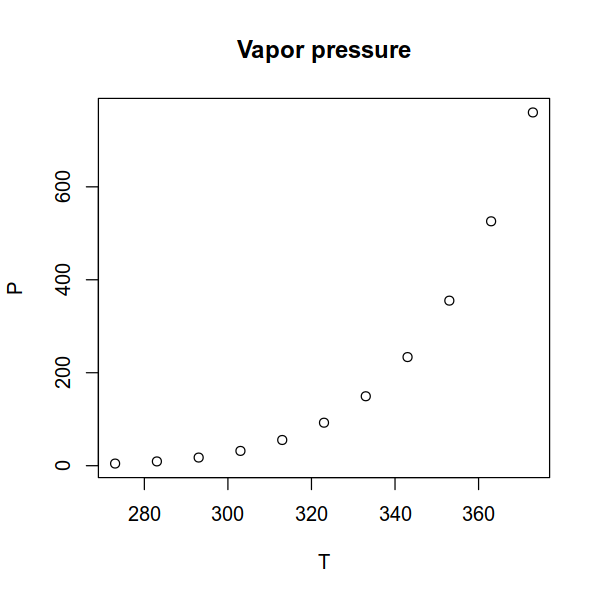

In [3]:
options(repr.plot.width=5, repr.plot.height=5) # set plot size
plot(P~T, data=df, main="Vapor pressure")

**1.2.** Fit the straight-line model. Compute the summary statistics and the residual plots. What are your conclusions regarding model adequacy?


Call:
lm(formula = P ~ T, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-120.63  -92.10  -37.66   64.33  222.55 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1956.258    363.807  -5.377 0.000446 ***
T               6.686      1.121   5.964 0.000212 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 117.6 on 9 degrees of freedom
Multiple R-squared:  0.7981,	Adjusted R-squared:  0.7756 
F-statistic: 35.57 on 1 and 9 DF,  p-value: 0.0002117


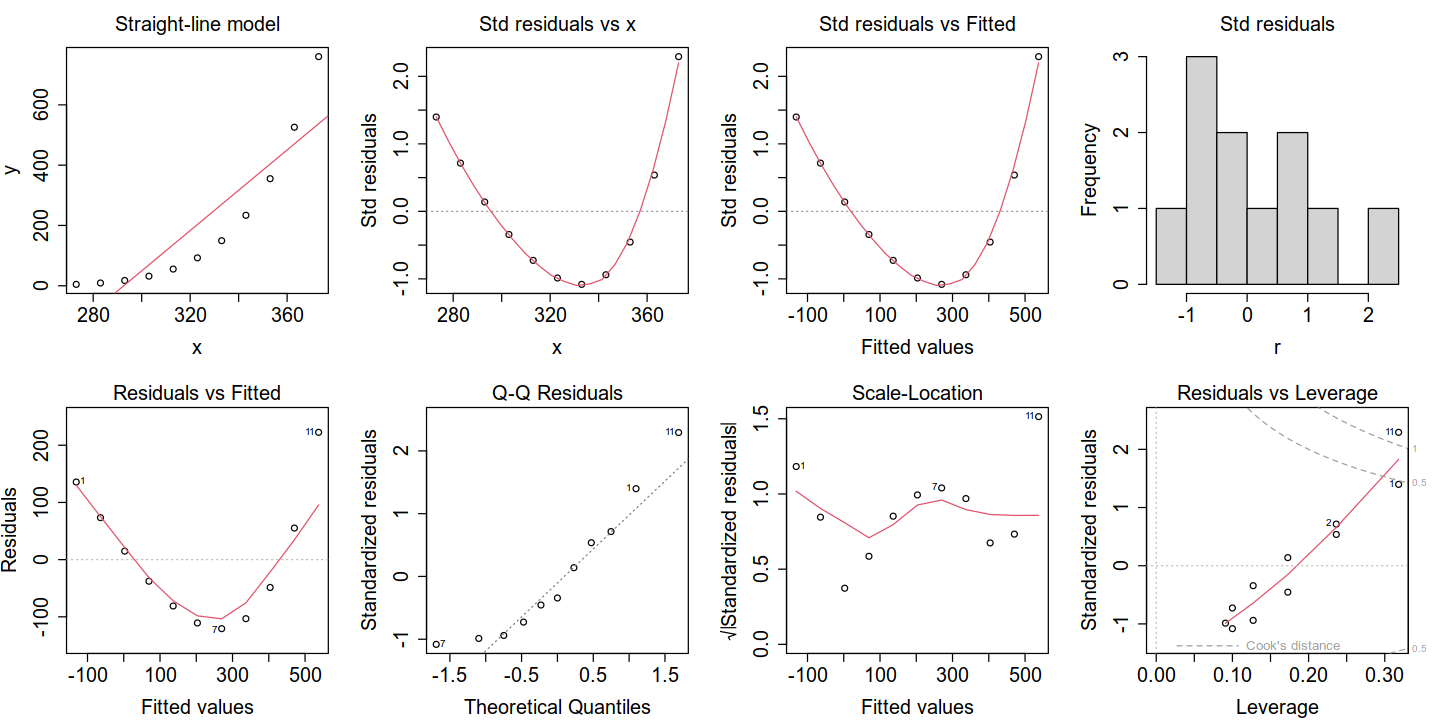

In [4]:
model = lm(P~T, data=df)  # fit the model
summary(model)            # summary statistics

regression_diagnostics(df$T, df$P)

**1.3.** From physical chemistry the Clausius-Clapeyron equation states that

$$
\ln(P) \sim - \frac{1}{T}
$$

Repeat Part 1.2. Using the appropriate transformation based on this information.

*Hint: Create new variables ``P1 = log(P)`` and ``T1=1/T``. Then plot ``P1`` versus and ``T1`` and fit a straight-line regression model.*


Call:
lm(formula = P1 ~ T1)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.030999 -0.013107  0.004863  0.016735  0.021260 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.061e+01  6.325e-02   325.8   <2e-16 ***
T1          -5.201e+03  2.014e+01  -258.3   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02067 on 9 degrees of freedom
Multiple R-squared:  0.9999,	Adjusted R-squared:  0.9999 
F-statistic: 6.672e+04 on 1 and 9 DF,  p-value: < 2.2e-16


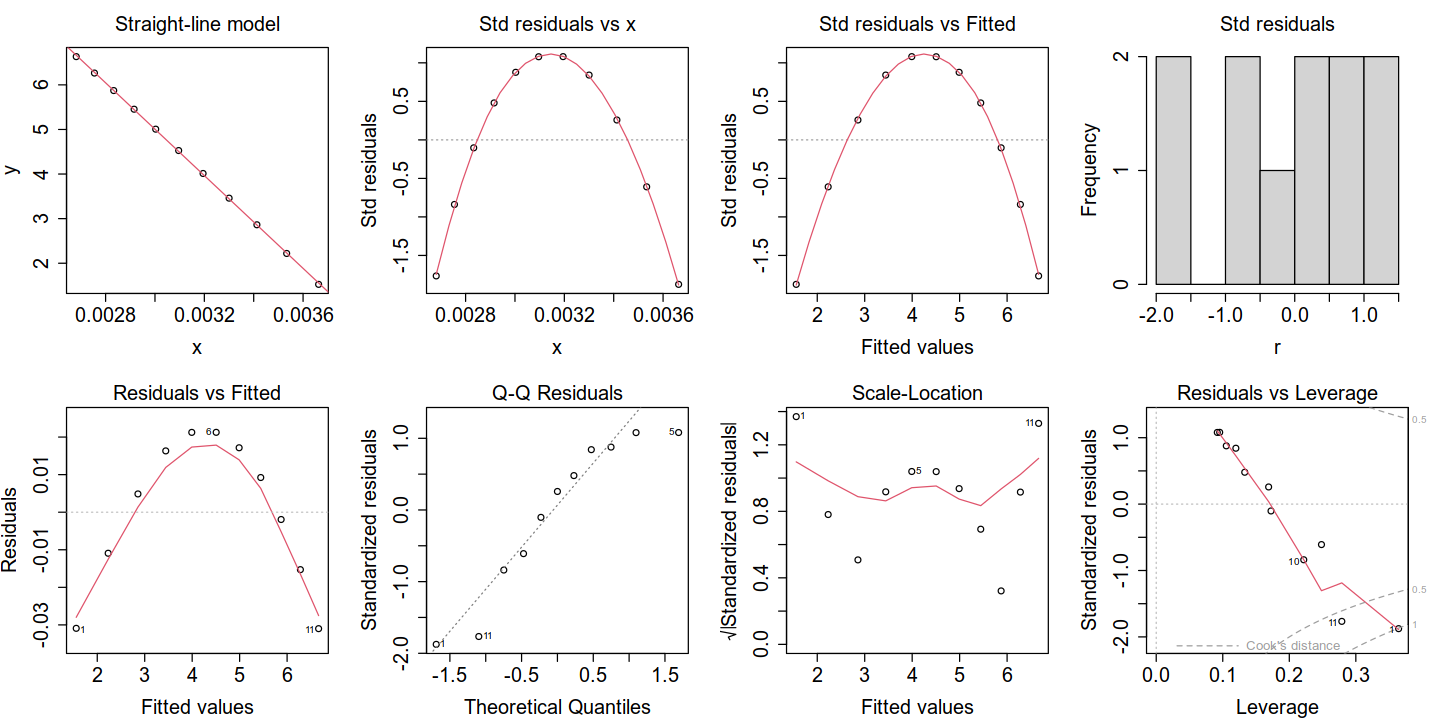

In [5]:
P1 = log(df$P)
T1 = 1/df$T

model = lm(P1~T1)  # fit the model
summary(model)     # summary statistics

regression_diagnostics(T1, P1)

---

### Example 2

Generate a random data set with normally distributed random errors:

In [6]:
set.seed(3) 
n   = 250                       # numbers of cases
x   = runif(n, min=10, max=70)  # predictor
err = rnorm(n, mean=0, sd=2)    # random errors
y   = ( x + err )^(1/4)         # responses: y^4 = x + error

**2.1.** Plot a scatter diagram. Does it seem likely that a straight-line model will be adequate?

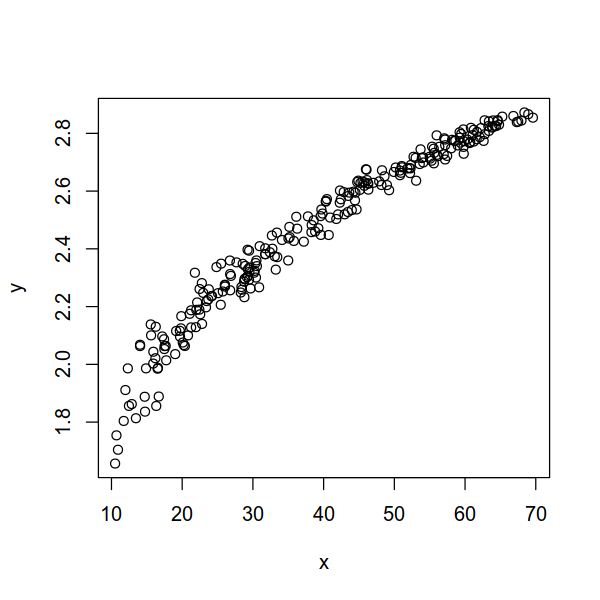

In [7]:
options(repr.plot.width=5, repr.plot.height=5) # set plot size
plot(x,y)

**2.2.** Fit the straight-line model. Compute the summary statistics and the residual plots. What are your conclusions regarding model adequacy?


Call:
lm(formula = y ~ x)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.314433 -0.034156  0.007339  0.045602  0.155130 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.7924963  0.0111588  160.63   <2e-16 ***
x           0.0169597  0.0002608   65.02   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06769 on 248 degrees of freedom
Multiple R-squared:  0.9446,	Adjusted R-squared:  0.9444 
F-statistic:  4227 on 1 and 248 DF,  p-value: < 2.2e-16


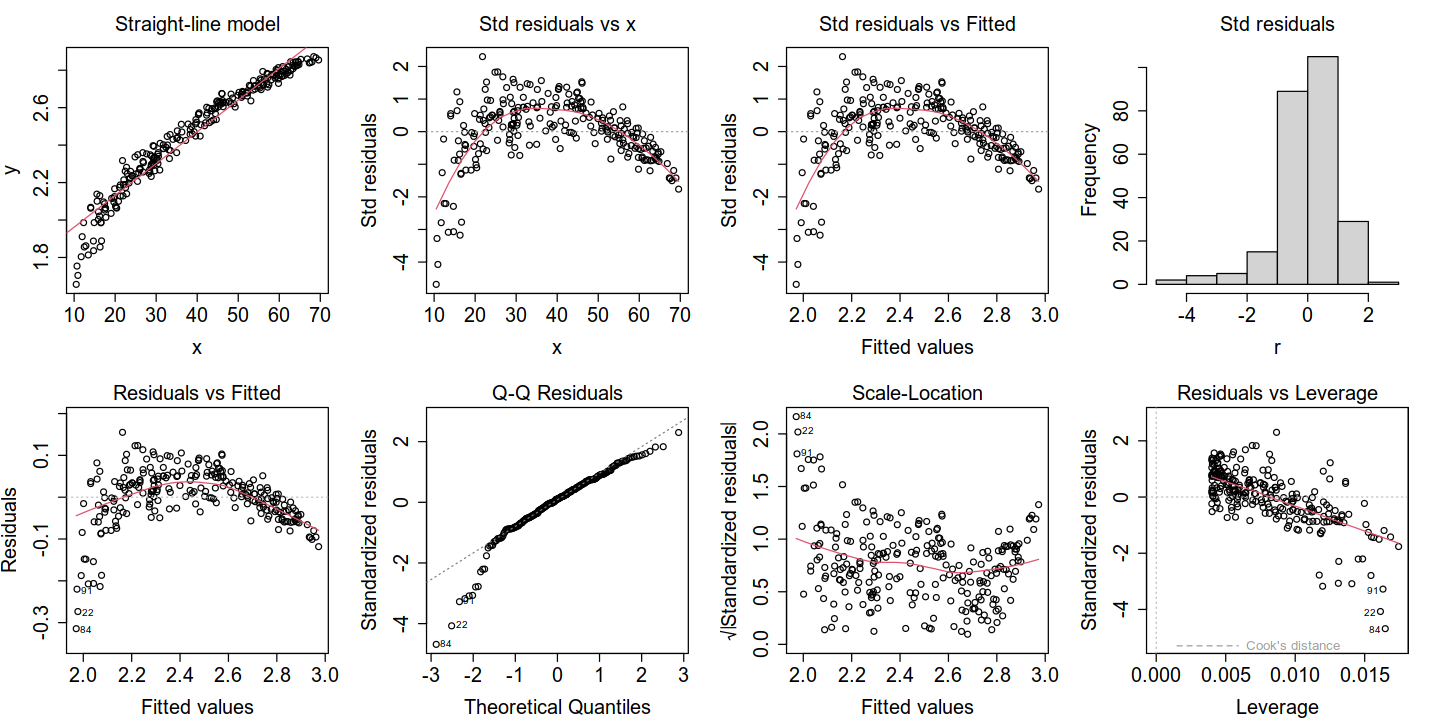

In [8]:
model = lm(y~x)  # fit the model
summary(model)   # summary statistics

regression_diagnostics(x, y) 

**2.3.** Use the Box-Cox method to find a suitable power transformation of the response variable, $y \to y^\lambda$. 

You need to load the ``MASS`` library first:
```R
> # install.packages("MASS") if needed
> library(MASS)
> boxcox(y~x)
```
Then choose appropriate minimum and maximum values of $\lambda$ to zoom in the plot
```R
> boxcox(y~x, lambda = seq(min, max, step))
```

Then repeat Step 2.2.

In [9]:
library(MASS)

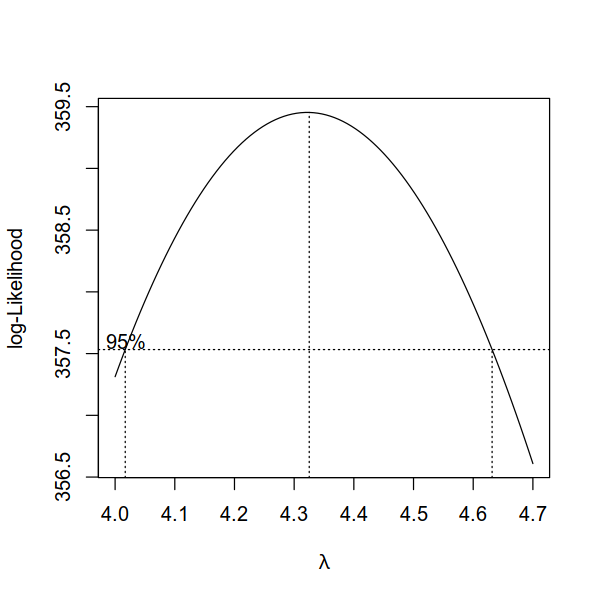

In [10]:
options(repr.plot.width=5, repr.plot.height=5) # set plot size
boxcox(y~x, lambda = seq(4, 4.7, 0.1))


Call:
lm(formula = y1 ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3507 -2.1776  0.0393  1.8815  9.1495 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.42448    0.49939  -4.855 2.13e-06 ***
x            1.39373    0.01167 119.393  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.029 on 248 degrees of freedom
Multiple R-squared:  0.9829,	Adjusted R-squared:  0.9828 
F-statistic: 1.425e+04 on 1 and 248 DF,  p-value: < 2.2e-16


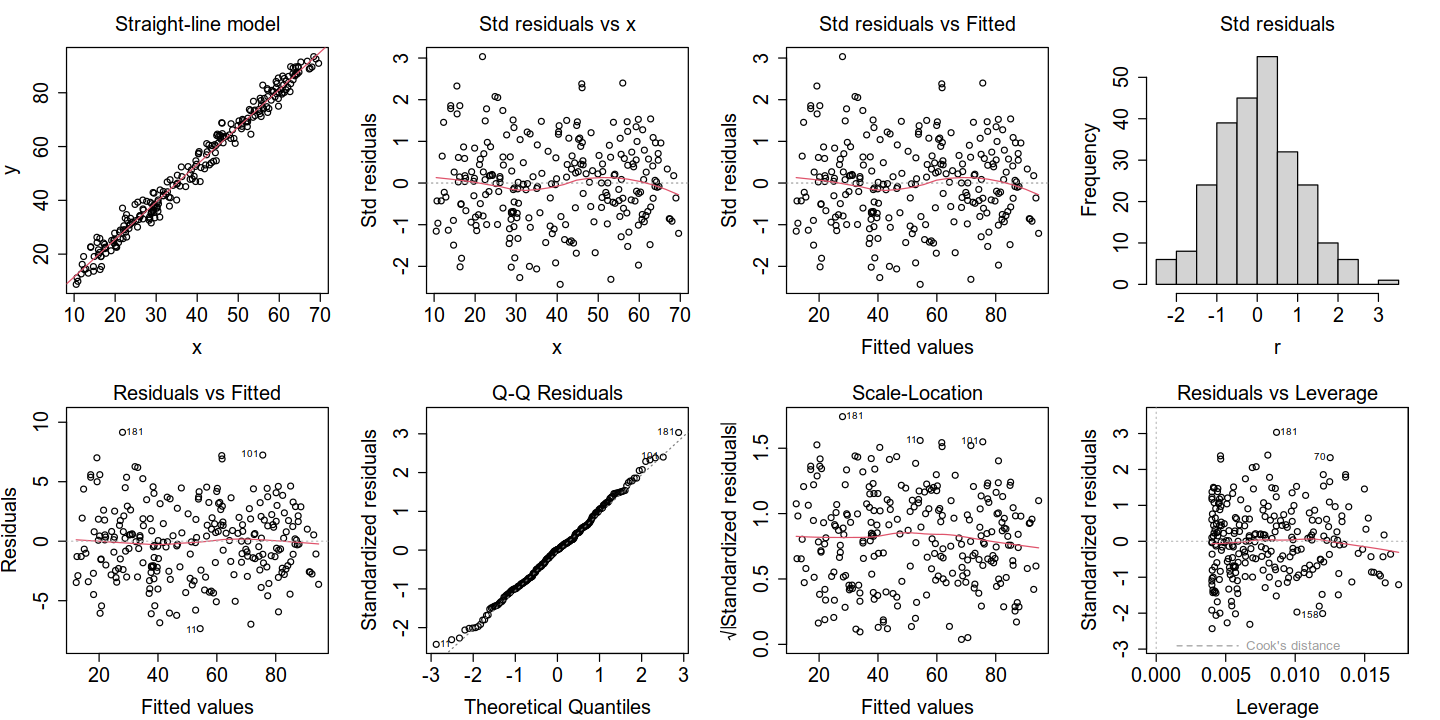

In [11]:
y1 = y^4.3  # transform response variable

model=lm(y1~x)
summary(model)

regression_diagnostics(x, y1)

---

### Example 3

Perform a thorough influence analysis of the following data sets and discuss your results. You need to clearly indicate outliers, good and bad leverage points, and influential observations. You can use built-in functions. Then repeat the key steps manually. You will need to use the following formulas:

- Standardised residuals:
$$
r_i = \frac{e_i}{\sqrt{\hat\sigma^2(1-h_{ii})}} \qquad \hat\sigma^2 = \frac{1}{n-2}\sum_{i=1}^n e_i^2 \qquad e_i = y_i - \hat y_i
$$

 A popular rule to classify the $i$th point as an outlier is if $|r_i|>2$ for small- and moderate-size data sets  and if $|r_i|>4$ for large-size data sets. 
 

- Leverage of the $i$th case:
$$
h_{ii} = \frac1n + \frac{(x_i - \bar x)^2}{s_{xx}} 
$$

 A popular rule to classify the $i$th point as a leverage point in a simple linear regression model is if
<br>
$$
h_{ii} > 2 \times \text{average}(h_{ii}) = 2 \times \frac2n = \frac4n
$$
<br> 
  A leverage point is a bad leverage point if it is also an outlier. Otherwise, it is a good leverage point.


- Cook's distance:
$$
D_i = \frac{r_i^2}{2}\cdot \frac{h_{ii}}{1-h_{ii}}
$$

 A recommend rough cut-off for noteworthy values of $D_i$ for simple linear regression is $4/(n-2)$.

**3.1.** Solar thermal energy test data, $y=$ total heat flux (kWatts) and $x=$ insolation (Watts/$m^2$),  given in [https://raw.githubusercontent.com/uqglmn/sm/main/solar.csv](https://raw.githubusercontent.com/uqglmn/sm/main/solar.csv).

In [12]:
# read data 
data = read.csv("https://raw.githubusercontent.com/uqglmn/sm/main/solar.csv")
str(data)
x = data$x
y = data$y
n = nrow(data)

'data.frame':	29 obs. of  2 variables:
 $ y: num  272 264 239 231 252 ...
 $ x: num  783 748 684 828 860 ...


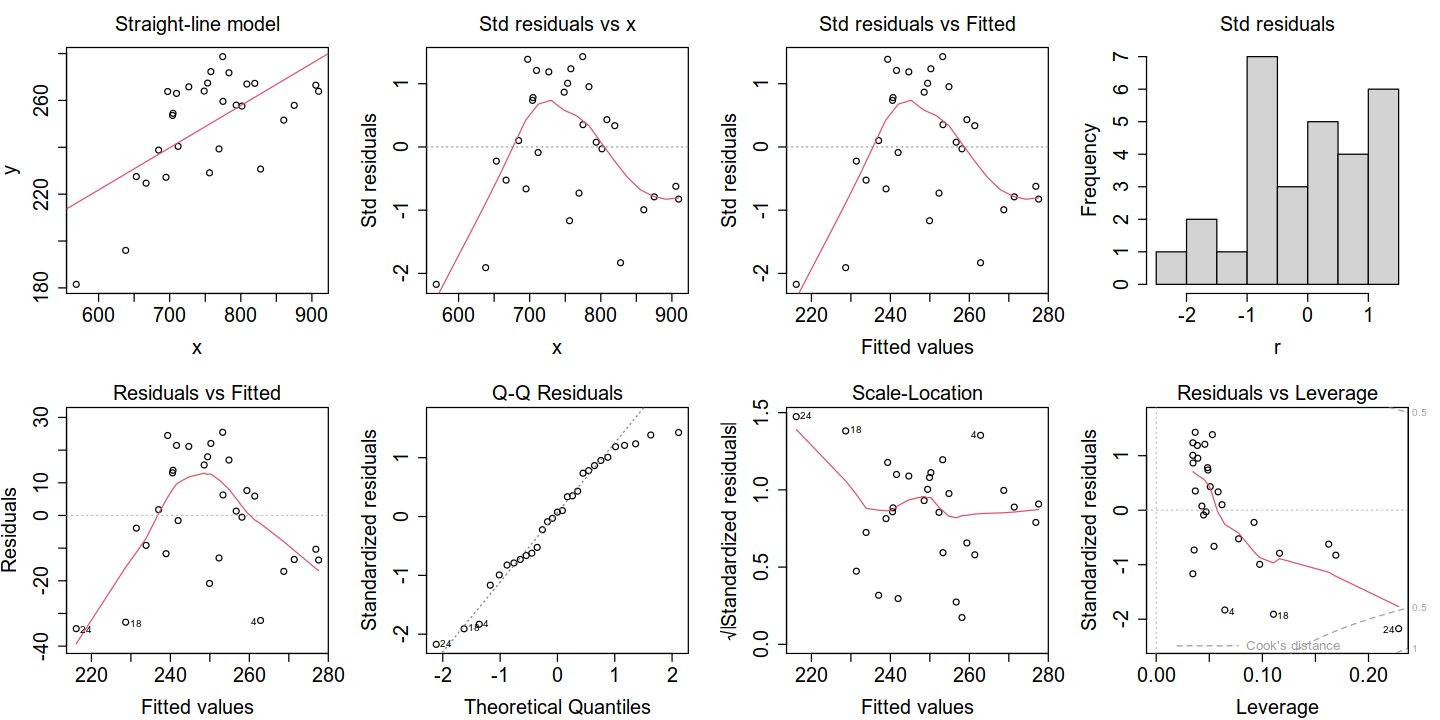

In [13]:
# we begin with a visual inspection of the data
options(repr.plot.width=3.5, repr.plot.height=3.5)
par(mfrow = c(1,1), mar=c(4,4,1,1))

regression_diagnostics(x, y)

The plots above suggest that the two left-most points may potentially be bad leverage points. We will use a numerical analysis to verify this heuristic hypothesis.

In [14]:
model = lm(y~x)
r = rstandard(model)    # standardised residuals
Outliers = abs(r) > 2   # outliers is a logical vector (FALSE, FALSE, TRUE, ...) indicating outliers

cat("There are", sum(Outliers), "outliers", "\n")
cat("Outlier cases are:", which(Outliers), collapse=" ")

There are 1 outliers 
Outlier cases are: 24  

In [15]:
h = hatvalues(model)   # leverages
Leverages = h > 4/n    # leverages is a logical vector (FALSE, FALSE, TRUE, ...) indicating leverage points

cat("There are", sum(Leverages), "leverages", "\n")
cat("Leverage cases are:", which(Leverages), collapse=" ")

There are 3 leverages 
Leverage cases are: 7 8 24  

In [16]:
BadLeverages  = Outliers & Leverages     # bad leverage = outlier + leverage
GoodLeverages = (!Outliers) & Leverages  # good leverages = not-outlier + leverage

cat("There are", sum(BadLeverages), "bad leverages and", sum(GoodLeverages), "good leverages \n")
cat("Bad leverage cases are:", which(BadLeverages), collapse=" ", "\n")
cat("Good leverage cases are:", which(GoodLeverages), collapse=" ", "\n")

There are 1 bad leverages and 2 good leverages 
Bad leverage cases are: 24   
Good leverage cases are: 7 8   


In [17]:
D = cooks.distance(model)   # Cook's distance
CooksCutOff = D > 4/(n-2)   # Cook's cut-off distance

cat("There are", sum(CooksCutOff), "highly influential cases \n")
cat("The influential cases are:", which(CooksCutOff), collapse=" ")

There are 2 highly influential cases 
The influential cases are: 18 24  

The case 24 is a bad leverage point, thus we will can safely remove it from the data set.

In [18]:
# remove bad leverage point 
# use tuples to remove multiple points, e.g. y1 = y[c(-18,-24)]
y1 = y[-24]
x1 = x[-24]
n1 = length(y1)
n1

[1] 28

Equivalently, we can use ``BadLeverages`` indicator we have defined above to remove the unwanted cases: ``!BadLeverages`` is the list of the wanted cases.

In [19]:
# remove bad leverage point
y1 = y[!BadLeverages]
x1 = x[!BadLeverages]
n1 = length(y1)
n1

[1] 28

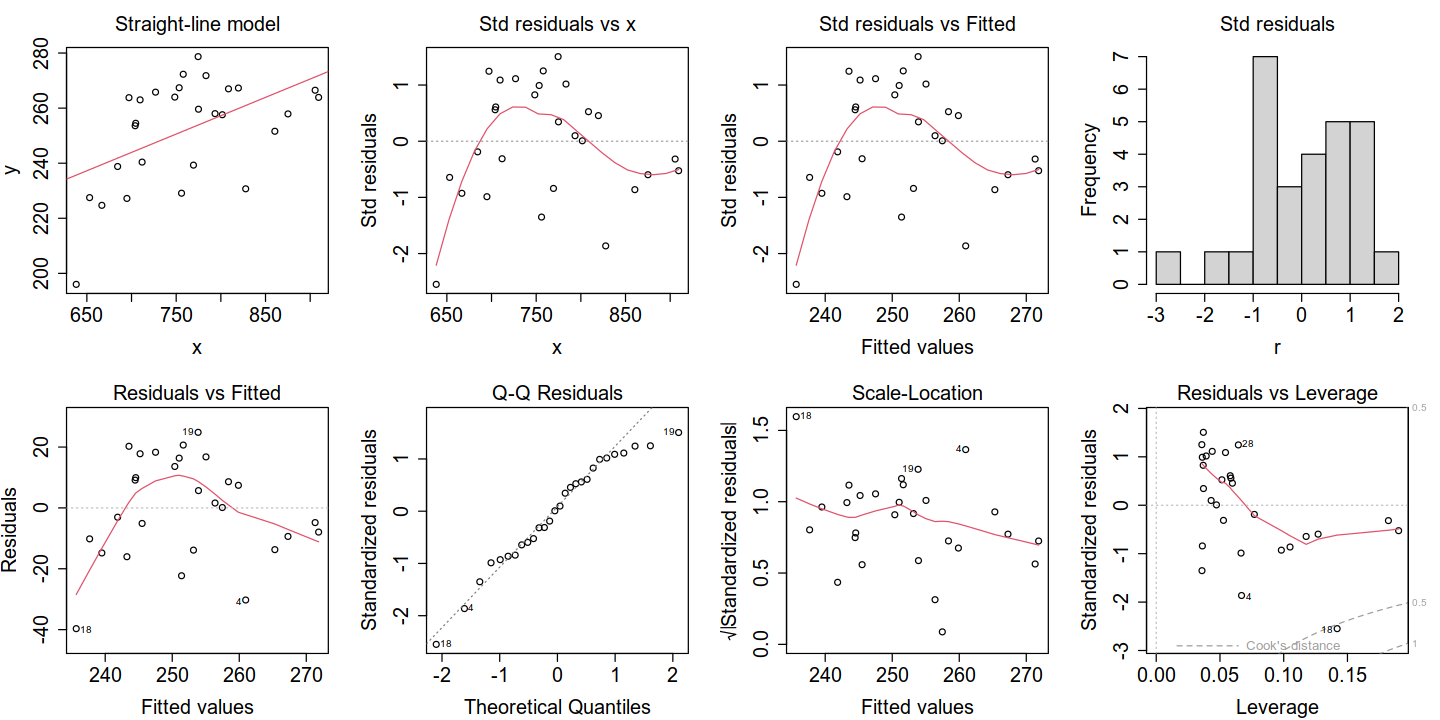

In [20]:
# regression diagnostics 
regression_diagnostics(x1, y1)

Let's repeat the same analysis one more time:

In [21]:
model1 = lm(y1~x1)
r1 = rstandard(model1)   # standardised residuals
Outliers = abs(r1) > 2   # outliers is a logical vector (FALSE, FALSE, TRUE, ...) indicating outliers

cat("There are", sum(Outliers), "outliers", "\n")
cat("Outlier cases are:", which(Outliers), collapse=" ")

There are 1 outliers 
Outlier cases are: 18  

In [22]:
h1 = hatvalues(model1)   # leverages
Leverages = h1 > 4/n1    # leverages is a logical vector (FALSE, FALSE, TRUE, ...) indicating leverage points

cat("There are", sum(Leverages), "leverages", "\n")
cat("Leverage cases are:", which(Leverages), collapse=" ")

There are 2 leverages 
Leverage cases are: 7 8  

In [23]:
BadLeverages  = Outliers & Leverages     # bad leverage = outlier + leverage
GoodLeverages = (!Outliers) & Leverages  # good leverages = not-outlier + leverage

cat("There are", sum(BadLeverages), "bad leverages and", sum(GoodLeverages), "good leverages \n")
cat("Bad leverage cases are:", which(BadLeverages), collapse=" ", "\n")
cat("Good leverage cases are:", which(GoodLeverages), collapse=" ", "\n")

There are 0 bad leverages and 2 good leverages 
Bad leverage cases are:    
Good leverage cases are: 7 8   


In [24]:
D = cooks.distance(model1)   # Cook's distance
CooksCutOff = D > 4/(n1-2)   # Cook's cut-off distance

cat("There are", sum(CooksCutOff), "highly influential cases \n")
cat("The influential cases are:", which(CooksCutOff), collapse=" ")

There are 1 highly influential cases 
The influential cases are: 18  

The case 18 is an outlier, thus we can try removing it and see if that helps.

In [25]:
y2 = y1[-18]
x2 = x1[-18]
n2 = length(y2)
n2

[1] 27

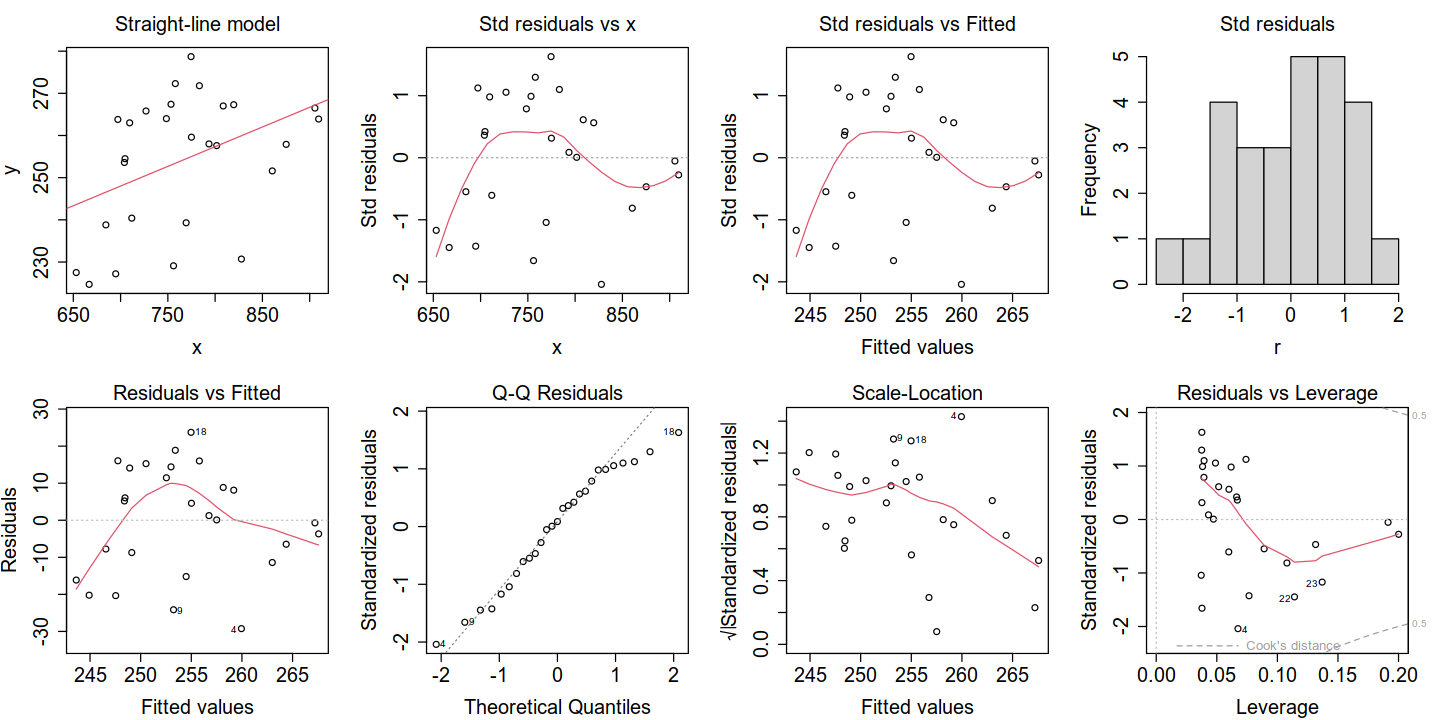

In [26]:
# regression diagnostics 
regression_diagnostics(x2,y2)

The data set given by variables ``y2`` and ``x2`` can now be investigated using linear regression methods. Although the resulting model is not going be a good one since the variance of the data is pretty large.

In [27]:
model2 = lm(y2~x2)
summary(model2)


Call:
lm(formula = y2 ~ x2)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.249 -10.060   1.254  12.773  23.723 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 182.66147   32.04305   5.701 6.16e-06 ***
x2            0.09336    0.04168   2.240   0.0342 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.84 on 25 degrees of freedom
Multiple R-squared:  0.1671,	Adjusted R-squared:  0.1338 
F-statistic: 5.017 on 1 and 25 DF,  p-value: 0.03423


We have $R^2=16.7\%$, which means that this model explains $16.7\%$ of variability in the data only.

---